In [83]:
# Variables
import tensorflow as tf

x = tf.constant(35, name='x')
y = tf.Variable(x + 5, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

40


In [84]:
import tensorflow as tf


x = tf.constant([35, 40, 45], name='x')
y = tf.Variable(x + 5, name='y')


model = tf.global_variables_initializer()

with tf.Session() as session:
	session.run(model)
	print(session.run(y))

[40 45 50]


In [85]:
import numpy as np
# x = np.random.randint(1000, size=10000)
# #y=5x2−3x+15
# y = tf.Variable(5*x*x-3*x+15, name='y')
# odel = tf.global_variables_initializer()
# model = tf.global_variables_initializer()
# with tf.Session() as session:
#     session.run(model)
#     print(session.run(y))


In [86]:
np.random.seed(5)

a = tf.Variable(0.0, name='a')
b = tf.Variable(0.0, name='b')
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    for i in range(1,10):
        a +=np.random.randint(1000)
        b=a/i
        session.run(model)
        print(session.run(b))        
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/Users/nimishasharath/", session.graph)
    

867.0
536.5
591.3334
693.0
578.0
548.3334
480.4286
421.375
456.77777


In [87]:
# Arrays
import matplotlib.image as mpimg
import os

# Load the image
image = mpimg.imread("/Users/nimishasharath/Documents/UW/AI/image-processing-shenanigans/Pokemon/data/Charizard/1.png")
height, width, depth = image.shape
# Print out its shape
print(image.shape)



(625, 705, 4)


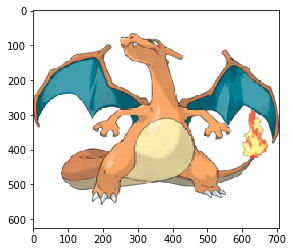

In [88]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

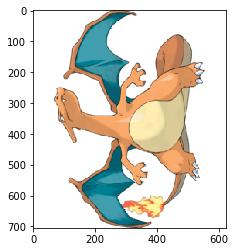

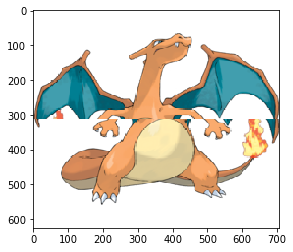

In [89]:
c=tf.Variable(image,name='c')
model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.transpose(c, perm=[1,0,2])
    y = tf.reverse_sequence(c, [width] * (height/2) + [0] * (height/2+1), 1, batch_dim=0)
    session.run(model)
    result1, result2= session.run([x,y])


plt.imshow(result1)
plt.show()
plt.imshow(result2)
plt.show()

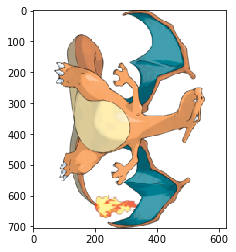

In [90]:
# Combine the transposing code with the flip code to rotate clock wise
with tf.Session() as session:
    x = tf.transpose(c, perm=[1,0,2])
    y = tf.reverse_sequence(x, [height] * width, 1, batch_dim=0)
    session.run(model)
    result2= session.run(y)


plt.imshow(result2)
plt.show()

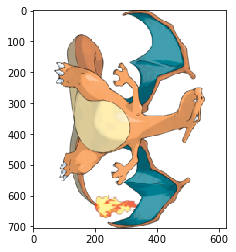

In [91]:
# Compute a “mirror”, where the first half of the image is copied, flipped (l-r) and then copied into the second half
with tf.Session() as session:
    x = tf.reverse_sequence(c, [height] * (width/2) + [0] * (width/2+1), 0, batch_dim=1)
    session.run(model)
    result1= session.run(y)


plt.imshow(result1)
plt.show()

## Placeholder 

In [97]:


x = tf.placeholder("float", [None, None])
y = x * 2

with tf.Session() as session:
    x_data = [[1, 2, 3],
              [4, 5, 6],]
    result = session.run(y, feed_dict={x: x_data})
    print(result)




[[ 2.  4.  6.]
 [ 8. 10. 12.]]


(625, 400, 4)


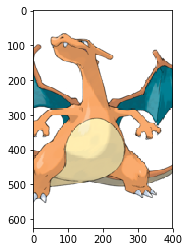

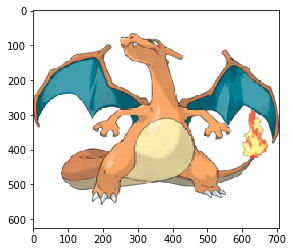

In [126]:
raw_image_data = mpimg.imread("/Users/nimishasharath/Documents/UW/AI/image-processing-shenanigans/Pokemon/data/Charizard/1.png")
image = tf.placeholder(shape=[None, None, None], dtype=tf.float64)
# First array is start points
# Second array is how much to take from start points
sl = tf.slice(image, [0,200,0], [-1, 400, -1])
with tf.Session() as session:
    result = session.run(sl, feed_dict={image: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()
plt.imshow(raw_image_data)
plt.show()

(625, 400, 3)


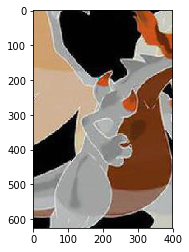

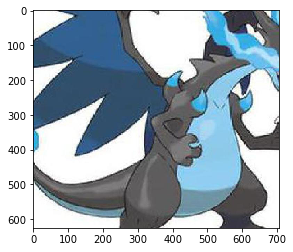

In [136]:
## Convert the image into grayscale. One way to do this would be to take just a single colour channel and show that. Another way would be to take the average of the three channels as the gray colour.
raw_image_data = mpimg.imread("/Users/nimishasharath/Documents/UW/AI/image-processing-shenanigans/Pokemon/data/Charizard/2.jpg")
image = tf.placeholder(shape=[None, None, None], dtype=tf.float64)
# First array is start points
# Second array is how much to take from start points
sl = tf.slice(image, [0,200,0], [-1, 400, -1])
with tf.Session() as session:
    result = session.run(sl, feed_dict={image: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()
plt.imshow(raw_image_data)
plt.show()

## Broadcasting

In [137]:
a = tf.constant([1, 2, 3], name='a')
b = tf.constant(4, name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[5 6 7]


In [138]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant([[1, 2, 3], [4, 5, 6]], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))
    

[[ 2  4  6]
 [ 8 10 12]]


In [146]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant([[100], [101]], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[[101 102 103]
 [105 106 107]]


In [156]:
#Create a 3-dimensional matrix. What happens if you add a scalar, array or matrix to it?
a = tf.constant([[1, 2, 3], [4, 5, 6], [7,8,9]], name='a')
b = tf.constant([[10, 20, 300],[-10, -20, -300], [-10, -20, -300]] , name='b')
## cant use tf.Variable !!
c = tf.constant(3, name='b')
add1 = a + b
add2 = a + c
with tf.Session() as session:
    print(session.run([add1, add2]))

[array([[  11,   22,  303],
       [  -6,  -15, -294],
       [  -3,  -12, -291]], dtype=int32), array([[ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]], dtype=int32)]


## Linear Equations

In [162]:
# Point 1
x1 = tf.constant(2, dtype=tf.float32)
y1 = tf.constant(9, dtype=tf.float32)
point1 = tf.stack([x1, y1])

# Point 2
x2 = tf.constant(-1, dtype=tf.float32)
y2 = tf.constant(3, dtype=tf.float32)
point2 = tf.stack([x2, y2])

# Combine points into an array
X = tf.transpose(tf.stack([point1, point2]))

# AX = B
# A = B * Inverse of X
B = tf.ones((1, 2), dtype=tf.float32)

parameters = tf.matmul(B, tf.matrix_inverse(X))

with tf.Session() as session:
    A = session.run(parameters)
b = 1 / A[0][1]
a = -b * A[0][0]
print("Equation: y = {a}x + {b}".format(a=a, b=b))

Equation: y = 2.0x + 5.00000029802


In [166]:
## for solving for a circle
## x2+y2+dx+ey+f=0
## given several points, get d e f >> convert into dx + ey + f = -(x2+y2)
points = tf.constant([[2, 1],
                 [0, 5],
                 [-1, 2]], dtype=tf.float64)

A = tf.constant([
    [2, 1, 1],
    [0, 5, 1],
    [-1, 2, 1]
], dtype='float64')

B = -tf.constant([[5], [25], [5]], dtype='float64')
X = tf.matrix_solve(A, B)

with tf.Session() as session:
    result = session.run(X)
    D, E, F = result.flatten()

    print("Equation: x**2 + y**2 + {D}x + {E}y + {F} = 0".format(**locals()))

Equation: x**2 + y**2 + -2.0x + -6.0y + 5.0 = 0
